In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from numpy import random
from mpmath import mp
import time 
import copy 
import csv

In [2]:

def load_csv_with_counter(file_name):
    row_counter = 0
    rowwise_lists = []

    # Open and read the CSV file
    with open(file_name, mode='r') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Skip header row

        # Iterate through each row in the CSV file
        for row in reader:
            row_as_int = [int(value) for value in row]  # Convert each value to integer
            rowwise_lists.append(row_as_int)
            row_counter += 1  # Increment the counter
    return rowwise_lists

file_name = "C:\\Intern\\Gittin\'s plots\\All codes directory\\Fig 3 B,C (Mono HR)\\jobsize_data_decHR.csv"  # Replace with the actual file name
rowwise_lists = load_csv_with_counter(file_name)


In [3]:
def calculate_v_values(Q_values_action1, Q_values_action2):
    V_values = np.zeros((100,9))
    for i in range(100):
        for j in range(9):
            V_values[i][j] = max(Q_values_action1[i][j],Q_values_action2[i][j])  # Use keepdims=True to maintain the 2D shape
    return V_values

V_true = np.zeros((100,9))
'''
V_true[1,:] = [ 2.88866783e+01,  3.15085928e+01,  3.40536870e+01,  3.57302799e+01,
   3.86458610e+01,  4.02700595e+01,  4.33413655e+01,  4.58000668e+01,
   4.77588016e+01]
V_true[2,:] =  [ 4.10888854e+01 , 4.65526320e+01,  5.26920938e+01,  5.59839147e+01,
   6.45651019e+01,  6.85675634e+01,  7.75534687e+01,  8.56410058e+01,
   9.25763321e+01]
V_true[3,:] =  [ 5.08628628e+01,  5.63930518e+01,  5.98191169e+01,  6.61043434e+01,
   7.16273587e+01,  7.58738044e+01,  8.24998123e+01,  8.61913750e+01,
   8.50192653e+01]
V_true[4,:] =  [ 6.24605652e+01,  6.27808790e+01,  6.82740106e+01,  7.22510249e+01,
   7.60514963e+01,  7.29368165e+01,  6.19245576e+01,  4.28895914e+01,
   1.27635876e+01]
V_true[5,:] =  [ 6.81366238e+01,  6.80016985e+01,  6.64720862e+01,  6.06085033e+01,
   4.33396239e+01,  3.39154748e+01,  1.60047605e+01,  5.21846082e+00,
   8.90324633e-01]
V_true[6,:] = [ 6.19898757e+01,  5.50271944e+01,  4.17116023e+01 , 2.65621589e+01,
   1.38618104e+01,  5.76521983e+00,  1.18218252e+00,  2.99576000e-01,
   0.00000000e+00]
V_true[7,:] =  [ 3.52320491e+01,  2.41356914e+01,  1.21776708e+01,  5.48761699e+00,
   2.23389373e+00,  8.89787830e-01,  0.00000000e+00,  0.00000000e+00,
   0.00000000e+00]
V_true[8,:] = [ 9.26027985e+00,  5.04402188e+00,  4.08399120e+00,  5.92930470e-01,
   1.18520760e+00,  0.00000000e+00,  2.98702000e-01,  0.00000000e+00,
   0.00000000e+00]
V_true[9,:] =  [ 1.76669278e+00,  1.77985116e+00,  2.95460000e-01,  0.00000000e+00,
   0.00000000e+00,  0.00000000e+00 , 0.00000000e+00  ,0.00000000e+00,
   0.00000000e+00]
'''
def bellman_relative_error(V_approx, V_true):
    nonzero_indices = V_true != 0
    if np.any(nonzero_indices):
        #relative_errors = np.abs((V_approx[nonzero_indices] - V_true[nonzero_indices]) / V_true[nonzero_indices])
        relative_errors = np.abs((V_approx[nonzero_indices] - V_true[nonzero_indices]))
        return np.mean(relative_errors)
    else:
        return np.nan

In [ ]:
V_true[1,:] = [18.39001075, 24.63113997, 28.37029607, 32.74919392, 36.6070096,  39.95416782,
  42.26659913, 45.21643186, 47.6777546 ]
V_true[2,:] =  [28.20408841, 38.31997852, 43.99755973, 52.84045075, 60.77817213, 69.34942784,
  74.86945361, 83.47013721, 92.19408469]
V_true[3,:] =  [23.39255981, 33.64927941, 41.51103384, 49.29737536, 60.0681885,  65.63925207,
  73.01061097, 78.24495162, 73.41496629]
V_true[4,:] =  [20.27661416, 31.27369285, 41.65217067, 48.66837802, 54.16685682, 57.77537873,
  54.99415751, 38.90083371, 13.70105255]
'''
V_true[5,:] =  [ 6.81366238e+01,  6.80016985e+01,  6.64720862e+01,  6.06085033e+01,
   4.33396239e+01,  3.39154748e+01,  1.60047605e+01,  5.21846082e+00,
   8.90324633e-01]
V_true[6,:] = [ 6.19898757e+01,  5.50271944e+01,  4.17116023e+01 , 2.65621589e+01,
   1.38618104e+01,  5.76521983e+00,  1.18218252e+00,  2.99576000e-01,
   0.00000000e+00]

V_true[7,:] =    [128.48545837, 141.00390625, 153.97828674, 166.02618408, 178.5397644,
  191.05331421, 199.67964172, 202.82250977, 205.09431458]

V_true[8,:] =  [149.43321228, 161.96673584, 174.99584961, 186.97392273, 199.48748779,
  212.00108337, 225.48692322, 233.56445312, 235.78044128]
V_true[9,:] =  [170.38093567, 182.92956543, 196.01341248, 207.92163086, 220.43519592,
  232.94877625, 246.63449097, 259.03582764, 266.46652222]
'''

'\nV_true[5,:] =  [ 6.81366238e+01,  6.80016985e+01,  6.64720862e+01,  6.06085033e+01,\n   4.33396239e+01,  3.39154748e+01,  1.60047605e+01,  5.21846082e+00,\n   8.90324633e-01]\nV_true[6,:] = [ 6.19898757e+01,  5.50271944e+01,  4.17116023e+01 , 2.65621589e+01,\n   1.38618104e+01,  5.76521983e+00,  1.18218252e+00,  2.99576000e-01,\n   0.00000000e+00]\n\nV_true[7,:] =    [128.48545837, 141.00390625, 153.97828674, 166.02618408, 178.5397644,\n  191.05331421, 199.67964172, 202.82250977, 205.09431458]\n\nV_true[8,:] =  [149.43321228, 161.96673584, 174.99584961, 186.97392273, 199.48748779,\n  212.00108337, 225.48692322, 233.56445312, 235.78044128]\nV_true[9,:] =  [170.38093567, 182.92956543, 196.01341248, 207.92163086, 220.43519592,\n  232.94877625, 246.63449097, 259.03582764, 266.46652222]\n'

In [52]:
def get_prob(step,p1,lamda):
    pi = [0]*step
    for i in range(1,step):
        pi[i]=(1-(1-p1)*((lamda)**(i)))
    mul = pi[step-1]
    return mul 

class envir():
    def __init__(self):
        self.phi = 9
        self.lamda = 0.8 
        self.p1=[]
        for i in range(9):
            self.p1.append(0.1*(i+1))

    def step(self,s,task,jobsize):
            #s_old = s[task]
            next_state = copy.copy(s)
            reward = [0]*9
            if (s[task] == jobsize[task] or s[task] == 0):
                next_state[task] = 0
            else:
                #print(s,task,get_prob(s[task],self.p1[task],self.lamda))
                next_state[task]+= 1 
            
            if s[task]!=0 and next_state[task] == 0:
                reward[task] = 1
            elif s[task]==0:
                reward[task] = -10000
            else:
                reward[task] = 0
            return next_state,reward[task]
        
    def getjobsize(self, job_counter):
        jobsize = rowwise_lists[job_counter]
        return jobsize

            

In [53]:
class Agent():
    def __init__(self,alpha,T,gamma):
        self.Q_values = np.zeros((100,2,100,9))
        self.phi = 9
        self.alpha = alpha
        self.T = T
        self.gamma = gamma
    def activate_task(self,s):
        num = []
        summ = 0
        prob = []
        for i in range(9):
            num.append(mp.exp((self.Q_values[s[i]][0][s[i]][i])/self.T))
            summ = summ + mp.exp((self.Q_values[s[i]][0][s[i]][i])/self.T)
        for i in range(9):
            prob.append(num[i]/summ)
        task = random.choice(9,1,p=prob)
        return task[0]

    def activate_task_eps_greedy(self,s,epsilon):
            wl= []
            p = np.array([0,0,0,0,0,0,0,0,0])
            if np.random.random() < epsilon:
                for i in range(len(p)):
                    if s[i]!=0:
                        wl.append(i)
                arm_to_pull = np.random.choice(wl,1)[0]
                p[arm_to_pull] = 1
                return arm_to_pull
            else:
                p2 = {}
                for i in range(len(p)):
                    if s[i]!=0:
                        p2[i] = self.Q_values[s[i]][0][s[i]][i]
                max_key = max(p2, key=p2.get)
                p[max_key] = 1
                return max_key
    
    def check_best_action(self,state):
        inds = np.argmax(state)
        all_inds = []
        for i in range(len(state)):
            if state[inds] == state[i]:
                all_inds.append(i)
        return all_inds

    def act_greedy(self,s,restart_prob,task):
        return max((self.Q_values[s[task]][0][restart_prob][task]),(self.Q_values[s[task]][1][restart_prob][task]))
    
    def update(self,s,task,next_state,reward):
        for k in range(10):
            self.Q_values[s[task]][0][k][task] = (1-self.alpha)*(self.Q_values[s[task]][0][k][task]) + self.alpha*(reward+self.gamma*(self.act_greedy(next_state,k,task)))
            self.Q_values[k][1][s[task]][task] = (1-self.alpha)*(self.Q_values[k][1][s[task]][task]) + self.alpha*(reward+self.gamma*(self.act_greedy(next_state,s[task],task)))

100%|██████████| 2500/2500 [04:22<00:00,  9.51it/s]


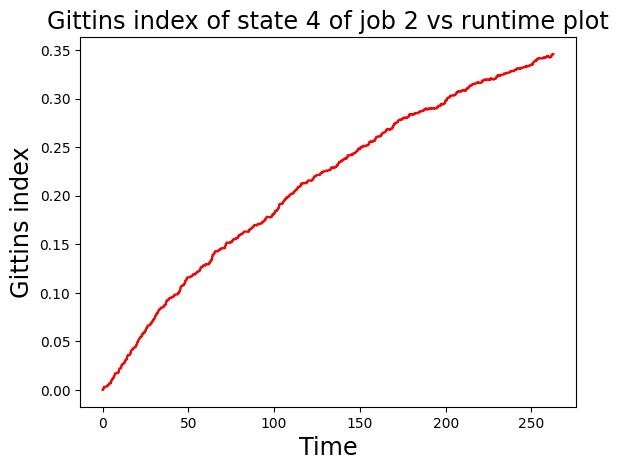

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [22.70232467 25.10255917 27.4956684  29.66543536 31.93618089 34.53516828
  36.97408157 39.41334258 42.47546134]
 [32.87958503 38.42181077 45.50406701 50.50668524 56.79490096 63.56209858
  71.22247242 77.79790815 84.58622129]
 [38.70690363 41.56179766 43.60949905 45.40485956 45.19775007 41.38788015
  35.70355654 29.62224256 16.63878245]
 [36.88960702 34.57974532 27.94057699 25.59447609 20.50547651 14.17205639
   9.38852359  4.40077183  1.45807604]
 [24.72347531 18.47382339 14.63755967  9.83098784  5.55509895  3.32895075
   1.45807048  0.95175285  0.        ]
 [11.56847883  7.72827639  5.06269726  2.6508807   1.46183364  0.53423685
   0.21740387  0.10864558  0.        ]
 [ 3.82543744  2.26492034  1.4572974   0.21653924  0.53643157  0.10955506
   0.          0.          0.        ]
 [ 1.05287897  0.32458023  0.42871556  0.21650042  0.10893266  0.
   0.          0.          0.        ]

In [ ]:
from tqdm import tqdm
class pull():
        start_time = time.time()
        env = envir()
        hist01 = []
        t = []
        agent = Agent(alpha=0.3,T=1000,gamma=0.99)
        episode = 2500
        agent.alpha = 0.1
        cumm_rew = []
        BRE = []
        plt_wrong_actions = []
        cumm_wrong_steps = []
        agent.gamma = 0.99
        agent.T = 750000
        Tmax = 750000
        Tmin = 0.25
        s = np.array([1,1,1,1,1,1,1,1,1])
        phi = 3
        eps = 1
        for ep_no in tqdm(range(episode)):
            s = np.array([1,1,1,1,1,1,1,1,1])
            episode_rew = 0
            jobsize = env.getjobsize(ep_no)
            eps = eps*0.9985
            while (s[0]!=0 or s[1]!=0 or s[2]!=0 or s[3]!=0 or s[4]!=0 or s[5]!=0 or s[6]!=0 or s[7]!=0 or s[8]!=0):
                #print(s)
                task = agent.activate_task(s)
                if len(cumm_rew)==0:
                    cumm_rew.append(episode_rew)
                else:
                    cumm_rew.append(cumm_rew[-1]+episode_rew)
                task_eps = agent.activate_task_eps_greedy(s,eps)
                task = task_eps
                task_opt = agent.check_best_action(s)
                if task_eps not in task_opt:
                    cumm_wrong_steps.append(1)
                else:
                    cumm_wrong_steps.append(0)
                plt_wrong_actions.append(np.mean(cumm_wrong_steps)*100)
                Q0 = np.zeros((100,9))
                M = np.zeros((100,9))
                for i in range(100):
                    for j in range(9):
                        Q0[i][j] = agent.Q_values[i][0][i][j]
                        M[i][j] = agent.Q_values[i][1][i][j]
                V_values = calculate_v_values(Q0,M)
                BRE.append(bellman_relative_error(V_values,V_true))

                #print(task)
                current_time = time.time()-start_time
                next_state,reward = env.step(s,task,jobsize)
                agent.update(s,task,next_state,reward)
                t.append(current_time)
                if((ep_no%100)==0):
                    agent.alpha = agent.alpha-0.000002
                s = copy.copy(next_state)
                hist01.append(0.01*agent.Q_values[4][0][4][1])
        plt.title('Gittins index of state 4 of job 2 vs runtime plot',fontsize='xx-large')
        plt.xlabel('Time', fontsize = 'xx-large')
        plt.ylabel('Gittins index',fontsize = 'xx-large')
        plt.plot(t,hist01,'-',c='red')
        plt.show()
        filename = 'C:\\Intern\\percent_wrong_restart_decHR.csv'
        V_values = calculate_v_values(Q0,M)
        print(V_values)
        # Writing to CSV file
        with open(filename, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['percent_wrong'])  # Writing the header
            for value in plt_wrong_actions:
                writer.writerow([value])  # Writing each value in a new row

        filename = 'C:\\Intern\\BRE_restart_decHR.csv'

        # Writing to CSV file
        with open(filename, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['BRE'])  # Writing the header
            for value in BRE:
                writer.writerow([value])  # Writing each value in a new row

        filename = 'C:\\Intern\\cumm_rew_restart_decHR.csv'

        # Writing to CSV file
        with open(filename, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['cumm_rew'])  # Writing the header
            for value in cumm_rew:
                writer.writerow([value])  # Writing each value in a new row     
